In [51]:
import pandas as pd
import time,datetime
import numpy as np
import matplotlib.pyplot as plt

## 1. 一共有多少不同的用户

In [29]:
#读取tags和ratings数据
tags = pd.read_csv(r'C:\Users\ZCY\Desktop\ml-25m\tags.csv')
ratings = pd.read_csv(r'C:\Users\ZCY\Desktop\ml-25m\ratings.csv')

In [34]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [26]:
data1 = tags['userId']
data2 = ratings['userId']
data3 = data1.append(data2)

In [29]:
data4 = data3.drop_duplicates()

In [30]:
len(data4)

162541

## 2. 一共有多少不同的电影

In [43]:
#读取movies数据
movies = pd.read_csv(r'C:\Users\ZCY\Desktop\ml-25m\movies.csv')

In [33]:
data5 = movies['movieId']
len(data5.drop_duplicates())

62423

## 3.一共有多少不同的电影种类

In [34]:
#取出电影种类字段
data6 = movies['genres']

In [46]:
temp_list=data6.str.split("|").tolist()
genre_list=list(set([i for j in temp_list for i in j ]))

In [50]:
len(genre_list)

20

## 4. 一共有多少电影没有外部链接

In [51]:
#读取links数据
links = pd.read_csv(r'C:\Users\ZCY\Desktop\ml-25m\links.csv')

In [52]:
len(data5.drop_duplicates())-len(links['movieId'].drop_duplicates())

0

In [64]:
##验证到底是不是0
result = movies[~ movies['movieId'].isin(links['movieId'])]
result

,movieId,title,genres


In [63]:
len(result)

0

## 5. 2018年一共有多少人进行过电影评分

In [4]:
ratings = pd.read_csv(r'C:\Users\ZCY\Desktop\ml-25m\ratings.csv')

In [5]:
import time, datetime

In [6]:
def time2(stamp):  #转时间戳函数
    timeArray = time.localtime(stamp)
    otherStyleTime = time.strftime("%Y",timeArray)
    return otherStyleTime

In [7]:
ratings['timestamp']=ratings['timestamp'].apply(time2)


In [10]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,2006
1,1,306,3.5,2006
2,1,307,5.0,2006
3,1,665,5.0,2006
4,1,899,3.5,2006


In [8]:
df1=ratings[ratings.timestamp=='2018']

In [9]:
df1

,userId,movieId,rating,timestamp
6740,51,50,2.5,2018
9939,75,1,5.0,2018
9940,75,5,4.0,2018
9941,75,6,3.0,2018
9942,75,17,4.5,2018
9943,75,39,3.0,2018
9944,75,47,3.5,2018
9945,75,48,3.5,2018
9946,75,50,4.0,2018
9947,75,105,3.5,2018


In [81]:
len(df1.drop_duplicates(['userId']))

11999

## 6.2018年评分5分以上的电影及其对应的标签

In [61]:
timeArray = time.strptime('2018-01-01 00:00:00', "%Y-%m-%d %H:%M:%S")
starttime = int(time.mktime(timeArray))
timeArray1 = time.strptime('2019-01-01 00:00:00', "%Y-%m-%d %H:%M:%S")
endtime = int(time.mktime(timeArray1))

In [62]:
rating2018 = ratings.loc[(ratings["timestamp"] < endtime) & (ratings["timestamp"] >= starttime)]
temp1 = rating2018.groupby(['movieId'],as_index=False)['rating'].agg({'avg_rating':'mean'})
temp2 = temp1.loc[temp1['avg_rating'] >= 5]#评分大于5的电影
temp2

,movieId,avg_rating
218,244,5.0
349,389,5.0
424,476,5.0
569,650,5.0
686,834,5.0
936,1168,5.0
1111,1360,5.0
1227,1525,5.0
1486,1890,5.0
1636,2049,5.0


In [63]:
# 提取2018年用户对电影的标签
tag2018 = tags.loc[(tags["timestamp"] < endtime) & (tags["timestamp"] >= starttime)]
tag2018

,userId,movieId,tag,timestamp
29,87,1127,aliens,1542308477
30,87,1127,amazing photography,1542308501
31,87,1127,Director: James Cameron,1542308487
32,87,1127,first contact,1542308468
33,87,1127,James Cameron,1542308492
34,87,1127,Michael Biehn,1542308483
35,87,1127,sci-fi,1542308464
36,87,6537,android(s)/cyborg(s),1542309549
37,87,6537,apocalypse,1542309703
38,87,6537,Arnold Schwarzenegger,1542309595


In [65]:
# 连接
result_temp=pd.merge(temp2, tag2018, how='left',on='movieId')
result = result_temp[['movieId','avg_rating','tag']]
result

,movieId,avg_rating,tag
0,244,5.0,NaN
1,389,5.0,NaN
2,476,5.0,NaN
3,650,5.0,death of husband
4,650,5.0,evil priest
5,650,5.0,mother daughter reunion
6,650,5.0,reunion
7,650,5.0,shipwreck
8,834,5.0,african american
9,834,5.0,beach


## 7.绘制电影复仇者联名（Avengers The (2012)）2018每月评分的平均值变化曲线图

In [66]:
TAID= movies.loc[(movies["title"] =="Avengers, The (2012)")].reset_index()# 找到电影信息 movieId
TAID

,index,movieId,title,genres
0,17067,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX


In [67]:
TA_user2018 = rating2018.loc[(rating2018["movieId"] == TAID.iloc[0].at['movieId'])] # 选择该电影2018年的评分
TA_user2018=TA_user2018.set_index('timestamp',drop=True)#时间戳是index
TA_user2018

,userId,movieId,rating
timestamp,,,
1516197925,108,89745,4.0
1517620000,275,89745,5.0
1540496982,321,89745,2.0
1534711509,403,89745,2.5
1528719049,475,89745,5.0
1518546567,486,89745,3.5
1542827257,541,89745,5.0
1540968442,542,89745,4.5
1534265026,607,89745,4.0


In [68]:
TA_user2018.index = pd.to_datetime(TA_user2018.index , unit='s')
TA_user2018

,userId,movieId,rating
timestamp,,,
2018-01-17 14:05:25,108,89745,4.0
2018-02-03 01:06:40,275,89745,5.0
2018-10-25 19:49:42,321,89745,2.0
2018-08-19 20:45:09,403,89745,2.5
2018-06-11 12:10:49,475,89745,5.0
2018-02-13 18:29:27,486,89745,3.5
2018-11-21 19:07:37,541,89745,5.0
2018-10-31 06:47:22,542,89745,4.5
2018-08-14 16:43:46,607,89745,4.0


Text(0,0.5,'avg_rating')

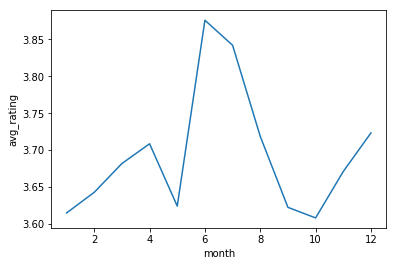

In [70]:
ratingM=TA_user2018.resample('M').mean()
X = np.arange(1, 13, 1)
Y = ratingM['rating']
plt.plot(X,Y)
plt.xlabel('month')
plt.ylabel('avg_rating')